In [1]:
# E Retailer dataset. Quartarly spenditure.  Need to predict Amount spent by considering other factor

In [ ]:
import os
import pandas as pd

In [2]:
data=pd.read_csv("dm.csv")

In [4]:
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [5]:
X=data.drop(['Cust_Id','AmountSpent'],axis=1)

In [6]:
X.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs
0,Old,Female,Own,Single,Far,47500,0,High,6
1,Middle,Male,Rent,Single,Close,63600,0,High,6
2,Young,Female,Rent,Single,Close,13500,0,Low,18
3,Middle,Male,Own,Married,Close,85600,1,High,18
4,Middle,Female,Own,Single,Close,68400,0,High,12


In [7]:
X=pd.get_dummies(X)

In [8]:
X.head()

,Salary,Children,Catalogs,Age_Middle,Age_Old,Age_Young,Gender_Female,Gender_Male,OwnHome_Own,OwnHome_Rent,Married_Married,Married_Single,Location_Close,Location_Far,History_High,History_Low,History_Medium
0,47500,0,6,0,1,0,1,0,1,0,0,1,0,1,1,0,0
1,63600,0,6,1,0,0,0,1,0,1,0,1,1,0,1,0,0
2,13500,0,18,0,0,1,1,0,0,1,0,1,1,0,0,1,0
3,85600,1,18,1,0,0,0,1,1,0,1,0,1,0,1,0,0
4,68400,0,12,1,0,0,1,0,1,0,0,1,1,0,1,0,0


In [9]:
y=data['AmountSpent']

In [10]:
import sklearn.model_selection as model_selection
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=200)

In [11]:
import sklearn.tree as tree
reg=tree.DecisionTreeRegressor(max_depth=3)
reg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [12]:
reg.score(X_test,y_test)

0.5915701153457273

In [13]:
reg.feature_importances_

array([0.68060902, 0.        , 0.17771448, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03685946,
       0.04537282, 0.05944422])

In [15]:
pd.Series(reg.feature_importances_,index=X.columns).sort_values(ascending=False).head(8)

Salary            0.680609
Catalogs          0.177714
History_Medium    0.059444
History_Low       0.045373
History_High      0.036859
Age_Middle        0.000000
Age_Old           0.000000
Age_Young         0.000000
dtype: float64

Salary is most important feature followed by catalogs

In [16]:
# install Graphviz software
import pydotplus
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [17]:
dot_data = tree.export_graphviz(reg, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data) 

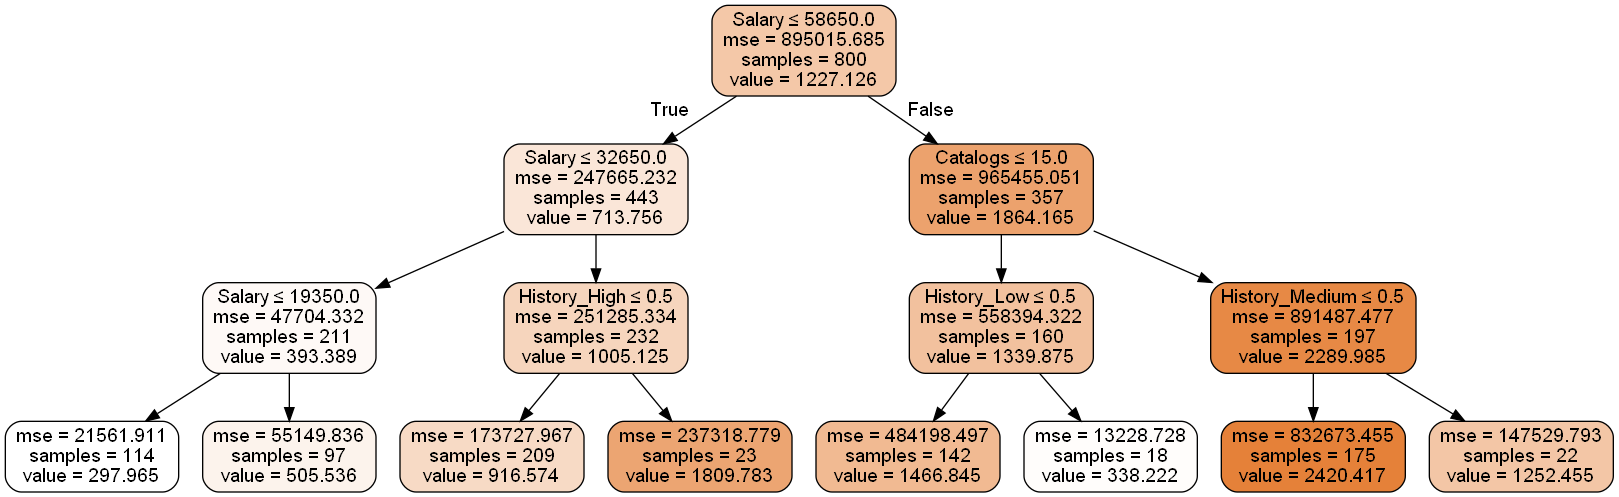

In [18]:
from IPython.display import Image
Image(graph.create_png())

## With this I created Xlsx file manually to check which group is spending more